In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (6, 3)

<Figure size 640x480 with 0 Axes>

In [3]:
pigs = cv2.imread('pic/1.jpg', flags = cv2.IMREAD_GRAYSCALE)
# pigs = cv2.imread('1.jpg')
print(pigs.shape)

(266, 333)


The original shape is (576, 720).

In [4]:
print((576 / 266 + 720 / 333) / 2)

2.1637878479983743


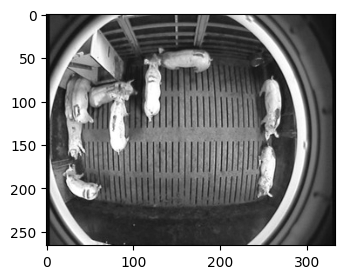

In [5]:
plt.imshow(pigs);

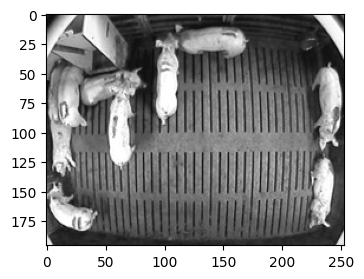

In [6]:
def cutEdge(img):
    dl, dr = 20, 60
    du, dd = 30, 40
    return img[du: -dd, dl: -dr]
pigs = cutEdge(pigs)
plt.imshow(pigs);

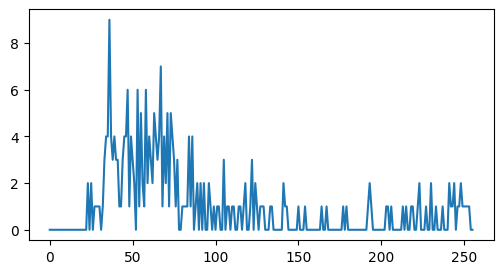

In [7]:
# hist = cv2.calcHist(pigs, channels = [0], mask = None, histSize = [256], ranges = [0, 255])
# plt.plot(hist);
pltHist = lambda img: plt.plot(cv2.calcHist(img, [0], None, [256], [0, 255]))
pltHist(pigs);

### Histogram Equalization

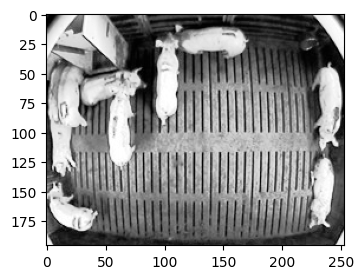

In [8]:
he_pigs = cv2.equalizeHist(pigs)
plt.imshow(he_pigs) 

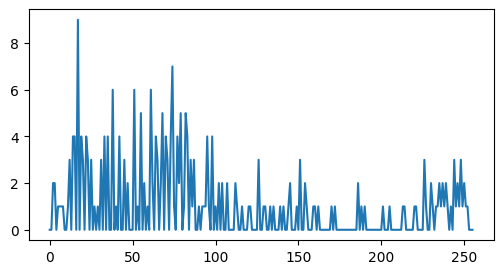

In [9]:
pltHist(he_pigs)

##### CLAHE

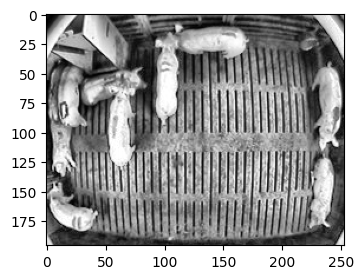

In [10]:
clahe = cv2.createCLAHE(clipLimit = 3)
clahe_pigs = clahe.apply(pigs)
plt.imshow(clahe_pigs)

##### AutoMSRCR

In [11]:
# 作者：开快车的蜗牛
# 链接：https://zhuanlan.zhihu.com/p/505187561
def AUTOMSRCR(img, sigma_list):
    # “sigma_list”: [15, 81, 201],多尺度高斯模糊sigma值
    img = np.float64(img) + 1.0

    retinex = np.zeros_like(img)
    for sigma in sigma_list:
        retinex += np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma))

    img_retinex = retinex / len(sigma_list)

    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(np.int32(img_retinex[:, :, i] * 100), return_counts=True)
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break

        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break

        img_retinex[:, :, i] = np.maximum(np.minimum(img_retinex[:, :, i], high_val), low_val)

        img_retinex[:, :, i] = (img_retinex[:, :, i] - np.min(img_retinex[:, :, i])) / \
                               (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i])) \
                               * 255

    dst = np.uint8(img_retinex)

    return dst

(196, 253, 3)


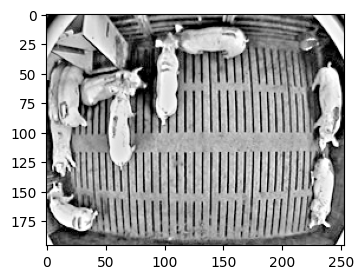

(196, 253)


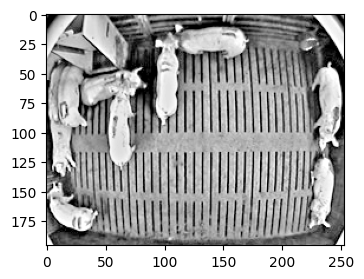

In [12]:
msrcr_pigs = AUTOMSRCR(cutEdge(cv2.imread('pic/1.jpg')), sigma_list = [3, 5, 11, 101])
print(msrcr_pigs.shape)
plt.imshow(msrcr_pigs);
plt.show()
msrcr_pigs = cv2.cvtColor(msrcr_pigs, code = cv2.COLOR_RGB2GRAY)
print(msrcr_pigs.shape)
plt.imshow(msrcr_pigs);
plt.show()

### Gaussian Lowpass Filter

In [13]:
%whos

Variable     Type        Data/Info
----------------------------------
AUTOMSRCR    function    <function AUTOMSRCR at 0x00000211696AADC0>
clahe        CLAHE       < cv2.CLAHE 000002116961D2D0>
clahe_pigs   ndarray     196x253: 49588 elems, type `uint8`, 49588 bytes
cutEdge      function    <function cutEdge at 0x000002116686E550>
cv2          module      <module 'cv2' from 'd:\\a<...>kages\\cv2\\__init__.py'>
he_pigs      ndarray     196x253: 49588 elems, type `uint8`, 49588 bytes
msrcr_pigs   ndarray     196x253: 49588 elems, type `uint8`, 49588 bytes
np           module      <module 'numpy' from 'd:\<...>ges\\numpy\\__init__.py'>
pigs         ndarray     196x253: 49588 elems, type `uint8`, 49588 bytes
plt          module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
pltHist      function    <function <lambda> at 0x0000021168E1D310>


In [59]:
LPF_pigs = pigs

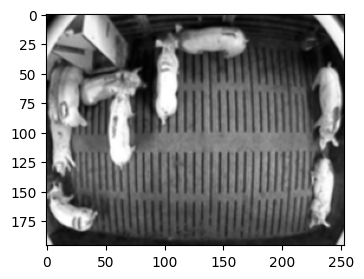

In [60]:
k = 3
LPF_pigs = cv2.GaussianBlur(LPF_pigs, ksize = (k, k), sigmaX = 0)
plt.imshow(LPF_pigs);

### Binarise (Otsu's method)

https://blog.csdn.net/qq_42886635/article/details/115181744

Otsu's method threshold: 118


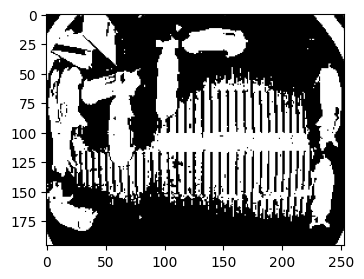

In [61]:
import mahotas
T = mahotas.thresholding.otsu(pigs)
print("Otsu's method threshold: %d" %T)
_, x = cv2.threshold(pigs, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
plt.imshow(x)

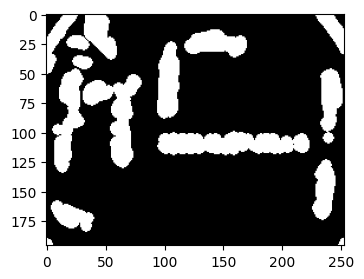

In [62]:
plt.imshow(cv2.morphologyEx(x, op = cv2.MORPH_OPEN, kernel = ker))

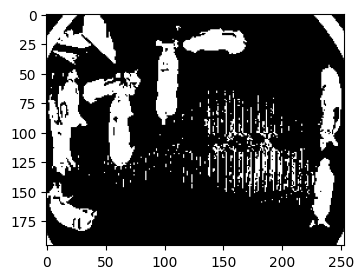

In [68]:
_, x = cv2.threshold(pigs, thresh = 150, maxval = 255, type = cv2.THRESH_BINARY)
plt.imshow(x)

### Morphological Operation

(664, 708)


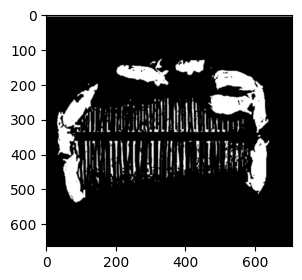

In [64]:
x = cv2.imread('pic/before_morpho.png', flags = cv2.IMREAD_GRAYSCALE)
print(x.shape)
plt.imshow(x);

In [65]:
ker = np.array([[int((i - 4.5) ** 2 + (j - 4.5) ** 2 < 22) for j in range(10)] for i in range(10)], \
               np.uint8)

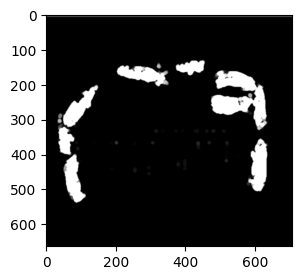

In [66]:
y = cv2.morphologyEx(x, op = cv2.MORPH_OPEN, kernel = ker)
plt.imshow(y)